In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
image_path = "../output_images/player_1.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

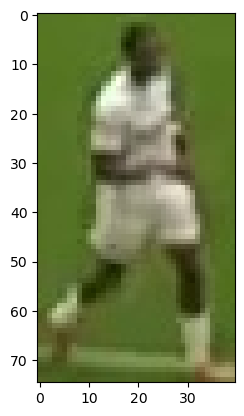

In [5]:
plt.imshow(image)   

**Generally T-Shirt on top half, thus take top half**

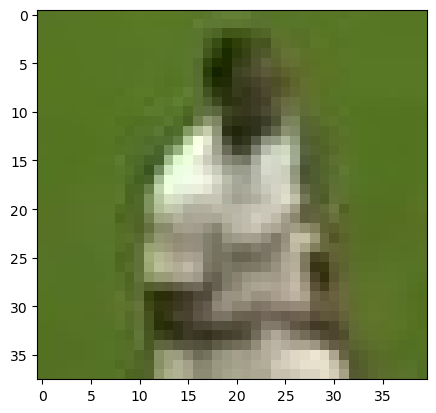

In [7]:
top_half_image = image[0:int(image.shape[0]/2+1), :]
plt.imshow(top_half_image)

**Here it is ok, but in many cases, we may have green jerseys, so we need to segment it from the background**<br><hr>
*The green jersey problem can be highlighted as a potential problem which can be highlighted as one of the challenges faced during the interview*

### Cluster the image into two clusters, one with the player and the other ground, basically we do segmentation

**Clustering using KMeans**

c:\Users\agnij\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\agnij\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


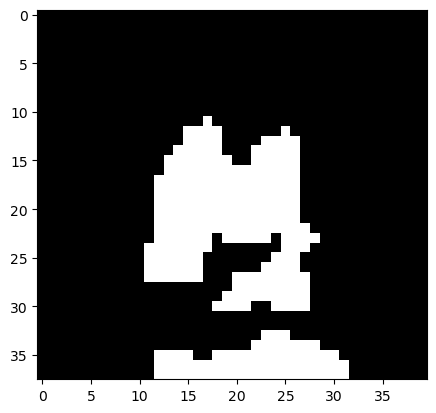

In [9]:
## Reshape the image into a 2D array
from sklearn.cluster import KMeans

image_2d = top_half_image.reshape(-1, 3)

# Pefrom KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

## Get the cluster centers and labels
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

## Resgape the labels to the original image shape
cluster_labels = cluster_labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

## Display the clustered image
plt.imshow(cluster_labels, cmap='gray')

To get which class is for jersey and which is not, we can use a simple logic.<br>
Generally, the corners will not have jersey. Thus the class of the corners can be class for non-jersey

In [11]:
corner_clusters = [cluster_labels[0,0], cluster_labels[0,-1], cluster_labels[-1,0], cluster_labels[-1,-1]]

player_cluster_class = max(set(corner_clusters), key=corner_clusters.count)


In [12]:
kmeans.cluster_centers_[player_cluster_class]

array([ 86.47925142, 108.14808788,  42.15622457])

This gives color of jersey